In [0]:
#UNI- bs3118
import matplotlib.pyplot as plt
import numpy as np
import os

# The code in this notebook should work identically in TF v1 and v2
import tensorflow as tf
import zipfile

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet

from google.colab import drive
drive.mount('/content/gdrive')

!unzip "/content/gdrive/My Drive/Colab Notebooks/dataset.zip"

base_dir = '/content/dataset/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_alma_dir = os.path.join(train_dir, 'alma')
train_lion_dir = os.path.join(train_dir, 'lion')
train_thinker_dir = os.path.join(train_dir, 'thinker')


validation_alma_dir = os.path.join(validation_dir, 'alma')
validation_lion_dir = os.path.join(validation_dir, 'lion')
validation_thinker_dir = os.path.join(validation_dir, 'thinker')

test_alma_dir = os.path.join(test_dir, 'alma')
test_lion_dir = os.path.join(test_dir, 'lion')
test_thinker_dir = os.path.join(test_dir, 'thinker')


num_alma_tr = len(os.listdir(train_alma_dir))
num_lion_tr = len(os.listdir(train_lion_dir))
num_thinker_tr = len(os.listdir(train_thinker_dir))

num_alma_test = len(os.listdir(test_alma_dir))
num_lion_test = len(os.listdir(test_lion_dir))
num_thinker_test = len(os.listdir(test_thinker_dir))

num_alma_val = len(os.listdir(validation_alma_dir))
num_lion_val = len(os.listdir(validation_lion_dir))
num_thinker_val = len(os.listdir(validation_thinker_dir))


total_train = num_alma_tr + num_lion_tr + num_thinker_tr 
total_val = num_alma_val + num_lion_val + num_thinker_val 
total_test = num_alma_test + num_lion_test + num_thinker_test 

print('Training alma images:', num_alma_tr)
print('Training lion images:', num_lion_tr)
print('Training thinker images:', num_thinker_tr)

print('Test alma images:', num_alma_test)
print('Test lion images:', num_lion_test)
print('Test thinker images:', num_thinker_test)

print('Validation alma images:', num_alma_val)
print('Validation lion images:', num_lion_val)
print('Validation thinker images:', num_thinker_val)


print("Total training images:", total_train)
print("Total validation images:", total_val)
print("Total test images:", total_test)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  /content/gdrive/My Drive/Colab Notebooks/dataset.zip
replace dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Training alma images: 357
Training lion images: 436
Training thinker images: 301
Test alma images: 149
Test lion images: 182
Test thinker images: 126
Validation alma images: 89
Validation lion images: 109
Validation thinker images: 76
Total training images: 1094
Total validation images: 274
Total test images: 457


Part 2


---


The dataset is split into training, testing and validation. We use the VGG16 network as the first network. The accuracy achieved for validation is 99.27%. 
The testing data gives a 100% accuracy. The VGG16 network has about 18 million parameters which is quite large compared to MobileNet which gives us a comparable accuracy and has far fewer parameters. 

The other two notebooks contain code for MobileNet and InceptionV3.

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 18,911,043
Trainable params: 18,911,043
Non-trainable params: 0
_________________________________________________________________
Found 1093 images belonging to 3 classes.
Found 274 images belonging to 3 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
9/9 [==============================] - 9s 954ms/

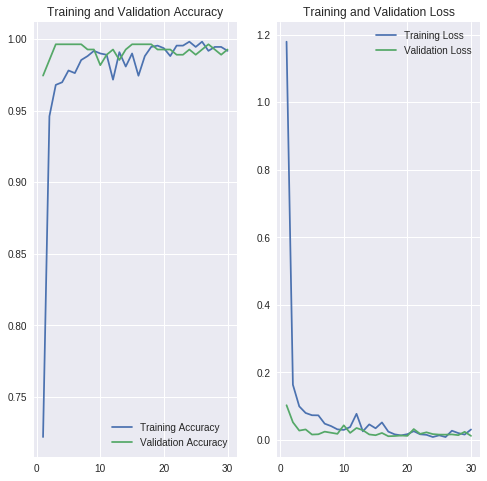

In [0]:
conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()
conv_base.trainable = False
TARGET_SHAPE = 150
BATCH_SIZE = 32
EPOCHS=30
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode='categorical')

# Validation data should not be augmented!
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=validation_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Now is a good time for a cup of coffee
history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=test_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')
model.evaluate(test_data_gen)

Found 457 images belonging to 3 classes.
15/15 [==============================] - 9s 593ms/step - loss: 6.0208e-04 - acc: 1.0000


[0.000602083147570435, 1.0]

The following code shows some sample images given to the model. The first 5 show sample training, next 5 show sample validation and the last 5 show sample testing. 

The three landmarks chosen were:


1.   Columbia Lion statue
2.   Alma mater statue
3.   The thinker statue

Each landmark was photographed under different conditons (sunlight, snow etc) with varying orientations and varying distances. Some images also contain only parrtial statues. 

Found 1093 images belonging to 3 classes.
Found 274 images belonging to 3 classes.
Found 457 images belonging to 3 classes.


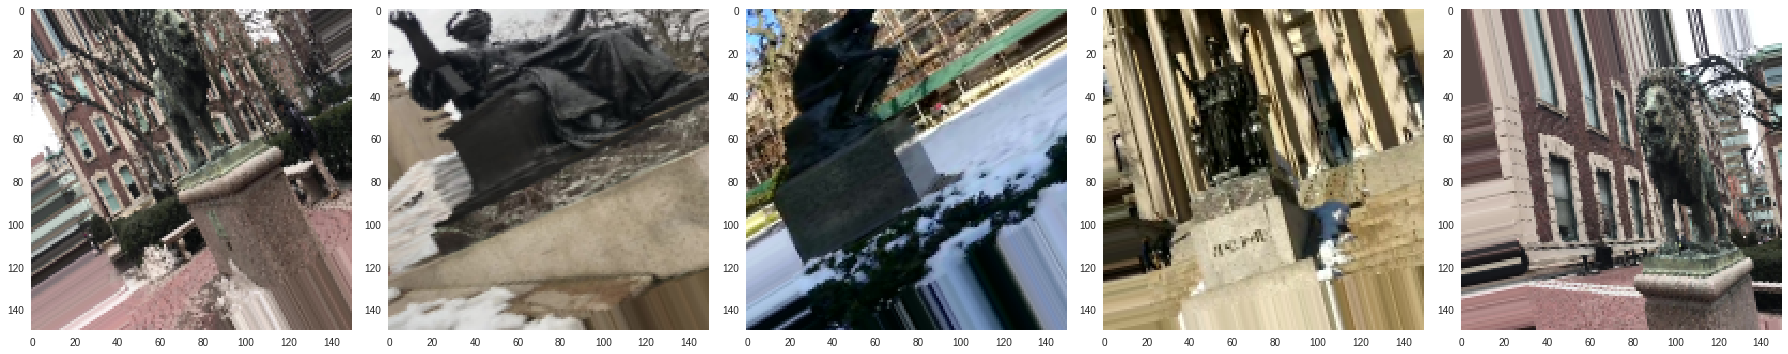

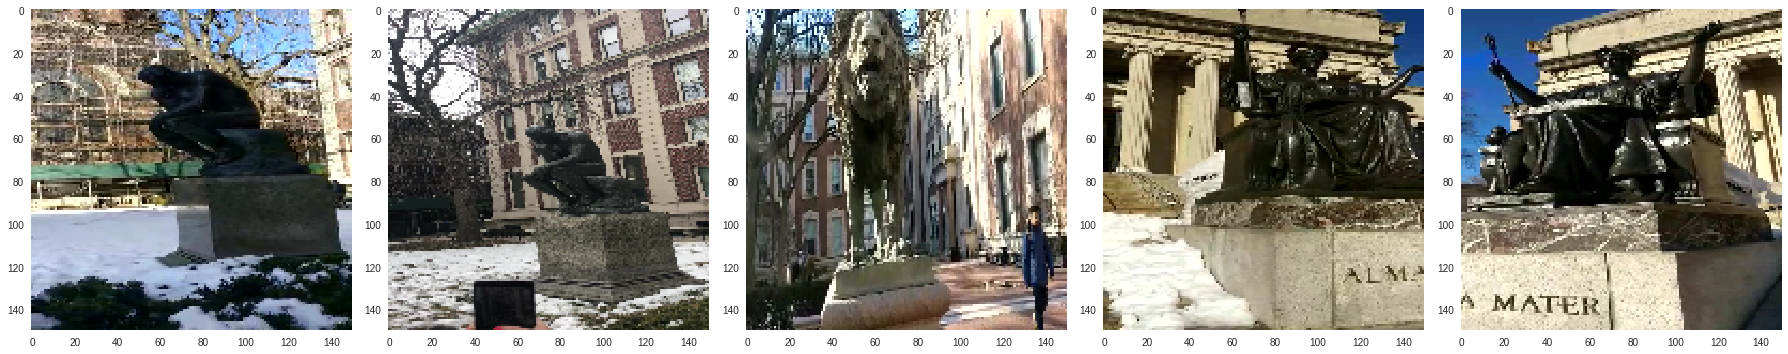

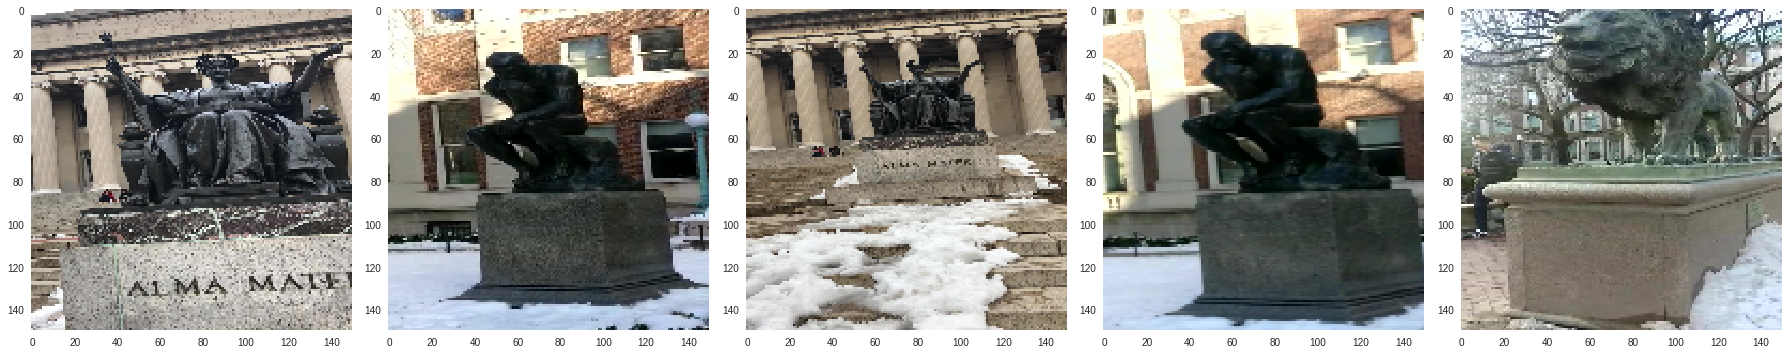

In [0]:
TARGET_SHAPE = 150
BATCH_SIZE = 32
EPOCHS=30
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode='categorical')

# Validation data should not be augmented!
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=validation_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')
test_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=test_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(25,25))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.grid(False)
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    

plotImages(sample_training_images[20:25])
plotImages(sample_validation_images[15:20])
plotImages(sample_test_images[10:15])